# Charging Station

## Data Preparation

In [17]:
import pandas as pd

# Load datasets
ev_population_data = pd.read_csv('C:/Users/user/Documents/Internship/Project Data/Electric_Vehicle_Population_Size_History.csv')
charging_station_data = pd.read_csv('C:/Users/user/Documents/Internship/Project Data/electric_vehicle_charging_station_list.csv')
state_charging_data = pd.read_excel('C:/Users/user/Documents/Internship/Project Data/State wise operational Public EV Charging Stations.xlsx')
highwise_charging_data = pd.read_excel('C:/Users/user/Documents/Internship/Project Data/Highwise_charging_station.xlsx')

ev_population_data.head()



,Date,Plug-In Hybrid Electric Vehicle (PHEV) Count,Battery Electric Vehicle (BEV) Count,Electric Vehicle (EV) Total
0,January 31 2017,8398,14799,23197
1,February 28 2017,8618,15308,23926
2,March 31 2017,8849,15799,24648
3,April 30 2017,9032,16455,25487
4,May 31 2017,9251,17031,26282


In [18]:
charging_station_data.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [19]:
state_charging_data.head()


,S. No.,State Name,No. of Operational PCS
0,1,Andaman & Nicobar,3
1,2,Andhra Pradesh,327
2,3,Arunachal Pradesh,9
3,4,Assam,86
4,5,Bihar,124


In [20]:
highwise_charging_data.head()

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,12
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30


In [96]:
# Check for missing values
print(ev_population_data.isnull().sum())
print(charging_station_data.isnull().sum())
print(state_charging_data.isnull().sum())
print(highwise_charging_data.isnull().sum())

# Drop or fill missing values if necessary
ev_population_data = ev_population_data.dropna()
charging_station_data = charging_station_data.dropna()
state_charging_data = state_charging_data.dropna()
highwise_charging_data = highwise_charging_data.dropna()

# Convert date column to datetime
ev_population_data['Date'] = pd.to_datetime(ev_population_data['Date'], errors='coerce')

# Convert relevant columns to numeric types
charging_station_data['latitude'] = pd.to_numeric(charging_station_data['latitude'], errors='coerce')
charging_station_data['longitude'] = pd.to_numeric(charging_station_data['longitude'], errors='coerce')
state_charging_data['No. of Operational PCS'] = pd.to_numeric(state_charging_data['No. of Operational PCS'], errors='coerce')
highwise_charging_data['EV Charging Stations Sanctioned'] = pd.to_numeric(highwise_charging_data['EV Charging Stations Sanctioned'], errors='coerce')


Date                                            0
Plug-In Hybrid Electric Vehicle (PHEV) Count    0
Battery Electric Vehicle (BEV) Count            0
Electric Vehicle (EV) Total                     0
dtype: int64
no            0
region        0
address       0
aux addres    0
latitude      0
longitude     0
type          0
power         0
service       0
dtype: int64
S. No.                    0
State Name                2
No. of Operational PCS    0
dtype: int64
Sl. No                             0
Category                           0
Expressways/Highways               0
EV Charging Stations Sanctioned    0
dtype: int64


## Data Integration

In [97]:
# Merge state-wise charging data with highwise charging data if there is a common column
merged_state_highwise = pd.merge(state_charging_data, highwise_charging_data, left_on='State Name', right_on='Category', how='inner')

# Display merged data
print(merged_state_highwise.head())


Empty DataFrame
Columns: [S. No., State Name, No. of Operational PCS, Sl. No, Category, Expressways/Highways, EV Charging Stations Sanctioned]
Index: []


## Analysis and Visualization

### Charging Stations Data

#### 1. Map Visualization

In [15]:
import folium

# Create a base map centered around India
map_center = [20.5937, 78.9629]  # Center of India
charging_map = folium.Map(location=map_center, zoom_start=5)

# Add a marker for each charging station
for index, row in charging_station_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Address: {row['address']}<br>Type: {row['type']}<br>Power: {row['power']}",
        icon=folium.Icon(color='blue', icon='bolt')
    ).add_to(charging_map)

# Display the map in Jupyter Notebook
from IPython.display import display
display(charging_map)


#### 2. Bar Chart of Charging Stations by State

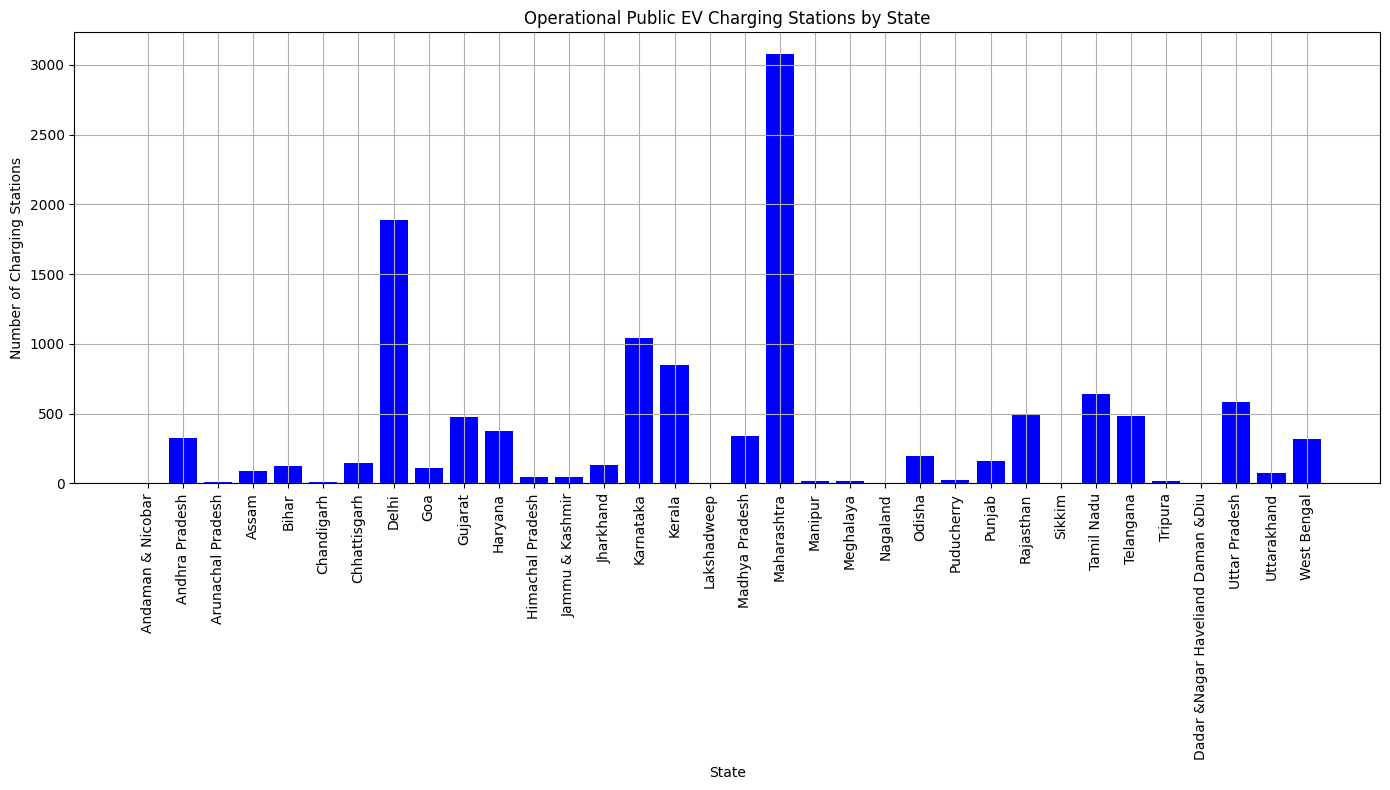

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.bar(state_charging_data['State Name'], state_charging_data['No. of Operational PCS'], color='blue')
plt.title('Operational Public EV Charging Stations by State')
plt.xlabel('State')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


## EV Population Data

#### Trend Analysis Over Time

In [11]:
import pandas as pd

# Convert the 'Date' column to datetime if not already
ev_population_data['Date'] = pd.to_datetime(ev_population_data['Date'], errors='coerce')


In [12]:
# Extract year from the 'Date' column
ev_population_data['Year'] = ev_population_data['Date'].dt.year

# Drop the 'Date' column if it’s not needed for aggregation
ev_population_data = ev_population_data.drop(columns=['Date'])

# Aggregate data by year
yearly_data = ev_population_data.groupby('Year').sum().reset_index()

# Display the aggregated data
print(yearly_data)


   Year  Plug-In Hybrid Electric Vehicle (PHEV) Count  \
0  2017                                        115077   
1  2018                                        157706   
2  2019                                        200781   
3  2020                                        225528   
4  2021                                        259637   

   Battery Electric Vehicle (BEV) Count  Electric Vehicle (EV) Total  
0                                212933                       328010  
1                                292182                       449888  
2                                416061                       616842  
3                                534999                       760527  
4                                691198                       950835  


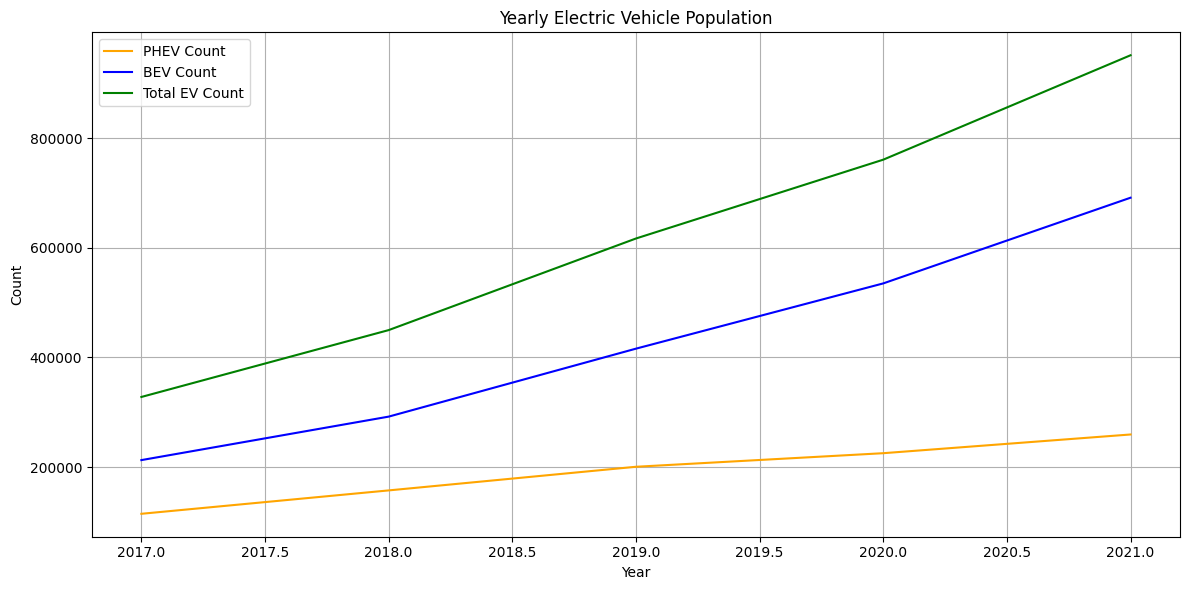

In [13]:
import matplotlib.pyplot as plt

# Plotting the trend of EV populations over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Plug-In Hybrid Electric Vehicle (PHEV) Count'], label='PHEV Count', color='orange')
plt.plot(yearly_data['Year'], yearly_data['Battery Electric Vehicle (BEV) Count'], label='BEV Count', color='blue')
plt.plot(yearly_data['Year'], yearly_data['Electric Vehicle (EV) Total'], label='Total EV Count', color='green')
plt.title('Yearly Electric Vehicle Population')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Growth Rate Analysis

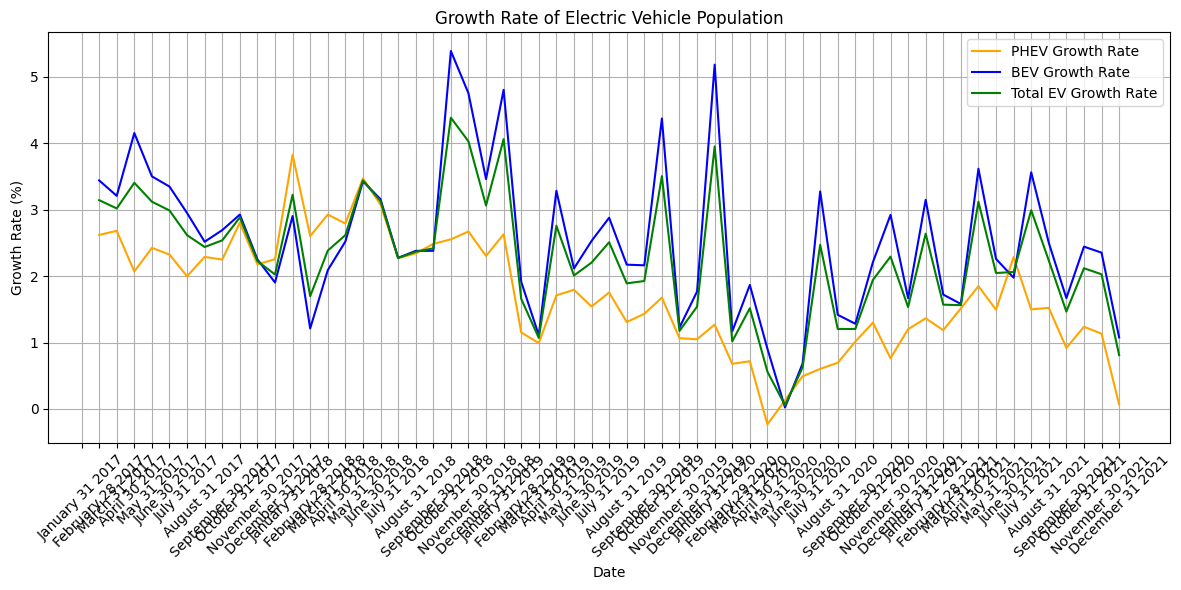

In [66]:
#Growth Rate Analysis

# Calculate growth rates
ev_population_data['PHEV Growth Rate'] = ev_population_data['Plug-In Hybrid Electric Vehicle (PHEV) Count'].pct_change() * 100
ev_population_data['BEV Growth Rate'] = ev_population_data['Battery Electric Vehicle (BEV) Count'].pct_change() * 100
ev_population_data['Total EV Growth Rate'] = ev_population_data['Electric Vehicle (EV) Total'].pct_change() * 100

plt.figure(figsize=(12, 6))

# Plot growth rates
plt.plot(ev_population_data['Date'], ev_population_data['PHEV Growth Rate'], label='PHEV Growth Rate', color='orange')
plt.plot(ev_population_data['Date'], ev_population_data['BEV Growth Rate'], label='BEV Growth Rate', color='blue')
plt.plot(ev_population_data['Date'], ev_population_data['Total EV Growth Rate'], label='Total EV Growth Rate', color='green')

plt.title('Growth Rate of Electric Vehicle Population')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


      no region                                            address  \
0      1   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
1      2   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
2      3   NDMC  Outside RWA Park, Jor Bagh Market, Jor Bagh Co...   
3      4   NDMC  Opposite Dory Pharmacy, Khanna Market, Aliganj...   
4      5   NDMC  Opposite Goel Opticals, Khanna Market, Aliganj...   
..   ...    ...                                                ...   
197  198  ANERT  State Council For Child Welfare, CV Raman Pill...   
198  199  ANERT  Shanghumukham beach, thiruvananthapuram,Kerala...   
199  200  ANERT  KTDC Tourist Reception Centre Shanmugham road,...   
200  201  ANERT  State Council For Child Welfare, CV Raman Pill...   
201  202   SDMC  EESL PVR Priya Vasant Vihar, SDMC parking New ...   

                                            aux addres   latitude  longitude  \
0    Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   

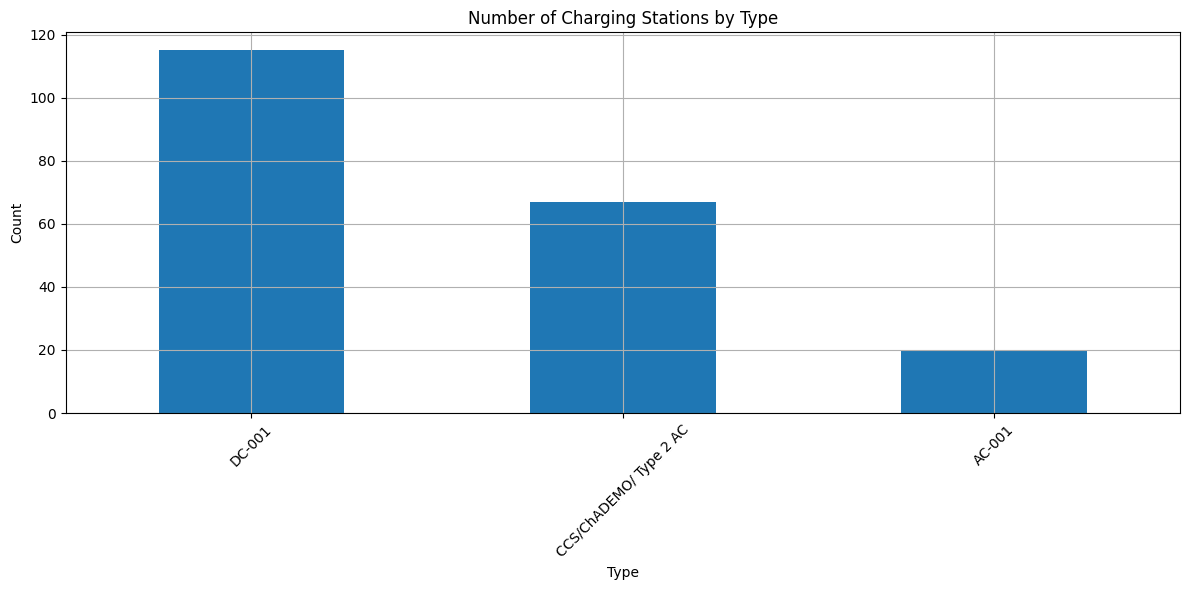

In [4]:
import matplotlib.pyplot as plt

# Bar chart of charging stations by type
plt.figure(figsize=(12, 6))
charging_station_data['type'].value_counts().plot(kind='bar')
print(charging_station_data)
plt.title('Number of Charging Stations by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load your data from the Excel file
file_path = 'C:/Users/user/Documents/Internship/Project Data/State wise operational Public EV Charging Stations.xlsx'
df = pd.read_excel(file_path)

# Ensure you have the necessary columns
assert 'Latitude' in df.columns
assert 'Longitude' in df.columns
assert 'State Name' in df.columns




In [70]:
# Create a base map centered around India
map_center = [20.5937, 78.9629]  # Center of India
map_visualization = folium.Map(location=map_center, zoom_start=5)

# Add marker clusters
marker_cluster = MarkerCluster().add_to(map_visualization)



In [72]:
# Check for missing values in Latitude and Longitude columns
print(df[['Latitude', 'Longitude']].isna().sum())


Latitude     2
Longitude    2
dtype: int64


In [73]:
# Drop rows with missing Latitude or Longitude
df = df.dropna(subset=['Latitude', 'Longitude'])


In [76]:
# Convert to numeric types (if they are not already)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')


In [79]:
for index, row in df.iterrows():
    state_name = row['State Name']
    latitude = row['Latitude']
    longitude = row['Longitude']

    if pd.notna(latitude) and pd.notna(longitude):  # Ensure no NaNs
        folium.Marker(
            location=[latitude, longitude],
            popup=f"State: {state_name}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

# Display the map
display(map_visualization)

### Most Number of Charging Stations by State

In [5]:
# Group by 'State Name' and sum the number of operational charging stations
state_charging_summary = state_charging_data.groupby('State Name')['No. of Operational PCS'].sum()

# Find the state with the maximum number of charging stations
top_state = state_charging_summary.idxmax()
top_state_count = state_charging_summary.max()

print(f"State with the most number of charging stations: {top_state} with {top_state_count} stations")


State with the most number of charging stations: Maharashtra with 3079 stations


In [6]:
# Group by state and count the number of charging stations
state_charging_counts = state_charging_data.groupby('State Name')['No. of Operational PCS'].sum().reset_index()

# Sort states by the number of charging stations in descending order
state_charging_counts = state_charging_counts.sort_values(by='No. of Operational PCS', ascending=False)

# Display the top states with the most charging stations
print(state_charging_counts.head(5))


     State Name  No. of Operational PCS
19  Maharashtra                    3079
8         Delhi                    1886
15    Karnataka                    1041
16       Kerala                     852
28   Tamil Nadu                     643


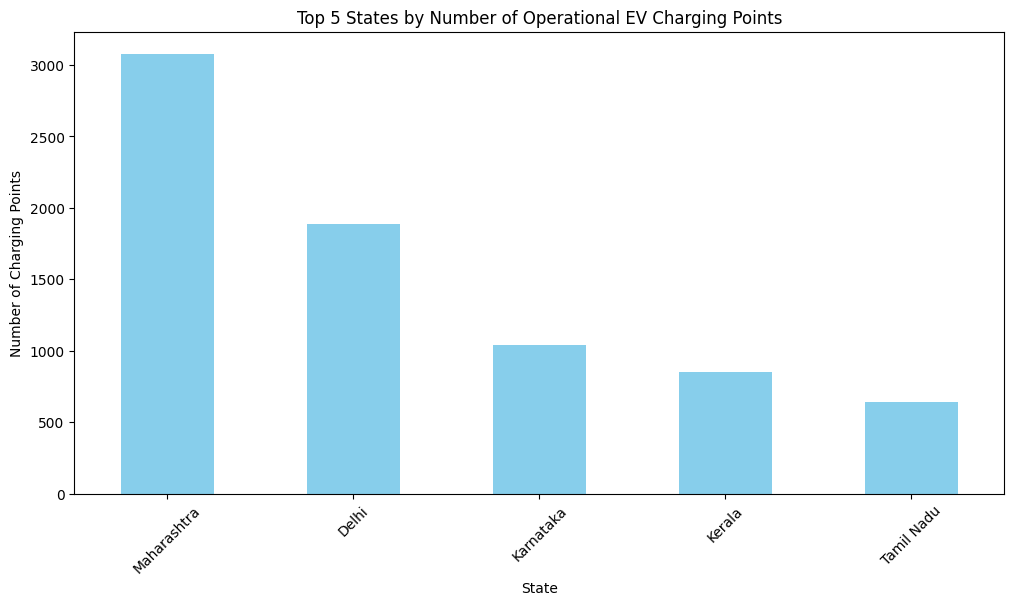

NameError: name 'sns' is not defined

<Figure size 800x800 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

# Top 5 states by number of operational EV charging points
top_5_charging_points = state_charging_data.groupby('State Name')['No. of Operational PCS'].sum().nlargest(5)

# Bar Chart
plt.figure(figsize=(12, 6))
top_5_charging_points.plot(kind='bar', color='skyblue')
plt.title('Top 5 States by Number of Operational EV Charging Points')
plt.xlabel('State')
plt.ylabel('Number of Charging Points')
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
top_5_charging_points.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_5_charging_points)))
plt.title('Distribution of Operational EV Charging Points')
plt.ylabel('')  # Hide the y-label for pie chart
plt.show()


### Highways with the Most Number of Charging Stations

In [22]:
import pandas as pd

# Load your data from the Excel file
file_path = 'C:/Users/user/Documents/Internship/Project Data/Highwise_charging_station.xlsx'
highwise_charging_data = pd.read_excel(file_path)

# Group by highway and count the number of charging stations
highway_charging_counts = highwise_charging_data.groupby('Expressways/Highways')['EV Charging Stations Sanctioned'].sum().reset_index()

# Sort highways by the number of charging stations in descending order
highway_charging_counts = highway_charging_counts.sort_values(by='EV Charging Stations Sanctioned', ascending=False)

# Display the top highways with the most charging stations
print(highway_charging_counts.head(5))


   Expressways/Highways  EV Charging Stations Sanctioned
25                Total                             1576
11      Delhi – Kolkata                              160
20       Mumbai - Delhi                              124
8   Chennai-Bhubaneswar                              120
16     Kolkata - Nagpur                              120


In [1]:
from sklearn.decomposition import PCA
